# Lorentzian fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Note that for simplicity here we will set $\sigma_i=1$ when calculating the residuals and the $\mathbf{A}$ matrix. This means our best fit $\chi^2$ will be $<1$. In a real application, you would want to put these factors back in.

In [2]:
def lorentz(a, x, finite_difference = False):
    # Calculates the Lorentz function and the derivative with respect to the parameters
    y = a[0] / (a[1] + (x-a[2])**2)
    A =  np.zeros([len(x), len(a)])
    if finite_difference:
        eps = 1e-8
        b = a * (1+eps)
        y0 = b[0] / (a[1] + (x-a[2])**2)
        y1 = a[0] / (b[1] + (x-a[2])**2)
        y2 = a[0] / (a[1] + (x-b[2])**2)
        A[:, 0] = (y0 - y) / (b[0]-a[0])
        A[:, 1] = (y1 - y) / (b[1]-a[1])
        A[:, 2] = (y2 - y) / (b[2]-a[2])
    else:
        A[:, 0] = 1 / (a[1] + (x-a[2])**2)
        A[:, 1] = - a[0] / (a[1] + (x-a[2])**2)**2
        A[:, 2] = 2 * a[0] * (x-a[2]) / (a[1] + (x-a[2])**2)**2
    return y, A

In [3]:
# Generate a set of "measurements" of a Lorentzian function
a0 = np.array((1.2, 2, 0.3))   # parameters of the Lorentzian
ndata = 100   # number of measurements 
x = np.linspace(-10, 10, ndata)
y, _ = lorentz(a0, x) 
y = y + 0.03 * np.random.normal(size = ndata)

In [4]:
# Initial guess for Newton's method
a = np.array((1,1,1))

# we have two options: analytic or numerical derivatives
finite_difference = True

# print the starting parameters and error
f, _ = lorentz(a, x, finite_difference=finite_difference)
r = y-f
last_chisq = 1e99
chisq = np.sum(r**2)
print("chisq = %g, a=(%lg, %lg, %lg)" % (chisq, a[0], a[1], a[2]))

# keep iterating while chi-squared drops by at least 1e-3
# note that this means we will also stop if chi-squared starts to increase
# which means we are not converging
while last_chisq - chisq > 1e-3:
    # calculate the update to the parameters
    f, A = lorentz(a, x, finite_difference=finite_difference)
    r = y-f
    lhs = A.T@A
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    a = a + da
    # update the error
    last_chisq = chisq
    f, _ = lorentz(a, x, finite_difference=finite_difference)
    r = y-f
    chisq = np.sum(r**2)
    print("chisq = %g, a=(%lg, %lg, %lg)" % (chisq, a[0], a[1], a[2]))
    
print("a-a0 =", a-a0)

chisq = 1.72415, a=(1, 1, 1)
chisq = 0.366203, a=(1.27584, 1.81913, 0.714446)
chisq = 0.098037, a=(1.40505, 2.3676, 0.375281)
chisq = 0.0871835, a=(1.31653, 2.19708, 0.272856)
chisq = 0.0871666, a=(1.31754, 2.19564, 0.276133)
a-a0 = [ 0.11754419  0.19564403 -0.02386721]


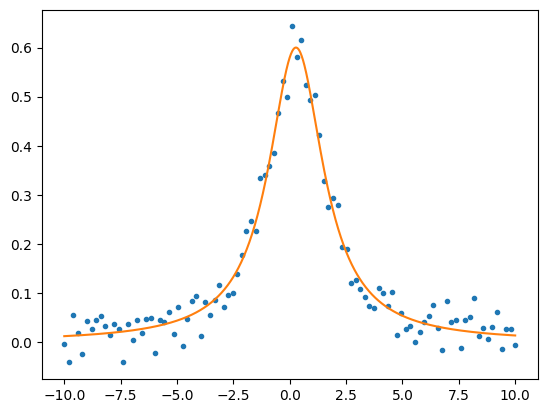

In [5]:
plt.plot(x, y, ".")

xx = np.linspace(-10, 10, 1000)
yy, _ = lorentz(a, xx)
plt.plot(xx,yy)

plt.show()

Best-fit parameters are:  [1.31738328 2.19528521 0.27616421]  chisq =  0.08716656879639278


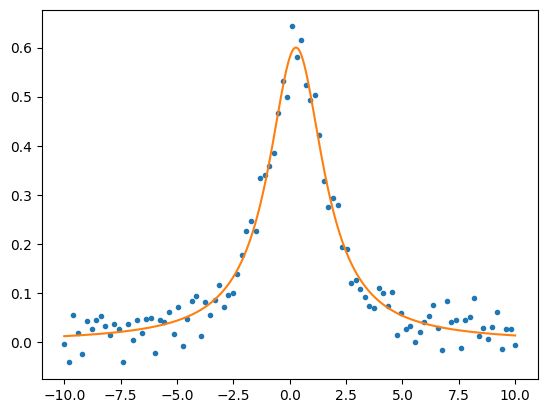

In [6]:
# Use the scipy least squares fitting routine to compare

import scipy.optimize

def res(a, x, y0):
    f = a[0] / (a[1] + (x-a[2])**2)
    return y-f

result = scipy.optimize.least_squares(res, (1,1,4), args=(x,y), method = 'lm')

print("Best-fit parameters are: ", result.x, " chisq = ", 2*result.cost)

plt.plot(x, y, ".")

xx = np.linspace(-10, 10, 1000)
yy, _ = lorentz(result.x, xx)
plt.plot(xx,yy)

plt.show()

chisq = 4.35686, a=(1.05795, 2.12318, 3.85023), lam = 0.001
chisq = 2.58937, a=(2.41681, 7.22586, 3.1834), lam = 0.0001
chisq = 1.21939, a=(6.08194, 23.1039, 0.424241), lam = 1e-05
chisq = 189.869, a=(-5.35986, -36.1361, 0.00413336), lam = 1e-06
chisq = 190.127, a=(-5.35976, -36.1356, 0.00413714), lam = 1e-05
chisq = 192.748, a=(-5.35873, -36.1302, 0.00417495), lam = 0.0001
chisq = 223.712, a=(-5.34844, -36.077, 0.00455263), lam = 0.001
chisq = 7920.81, a=(-5.24659, -35.5496, 0.00829243), lam = 0.01
chisq = 230.572, a=(-4.31971, -30.7507, 0.0423246), lam = 0.1
chisq = 32.796, a=(0.361032, -6.51611, 0.214187), lam = 1
chisq = 1.04234, a=(5.04177, 17.7185, 0.38605), lam = 10
chisq = 57.7565, a=(0.897392, -2.6169, 0.2344), lam = 1
chisq = 0.886796, a=(4.28825, 14.0211, 0.358477), lam = 10
chisq = 1159.32, a=(1.19336, -0.397116, 0.247023), lam = 1
chisq = 0.752211, a=(3.72554, 11.3996, 0.338213), lam = 10
chisq = 4.63378, a=(1.36124, 0.910213, 0.255241), lam = 1
chisq = 0.637387, a=(3.2956

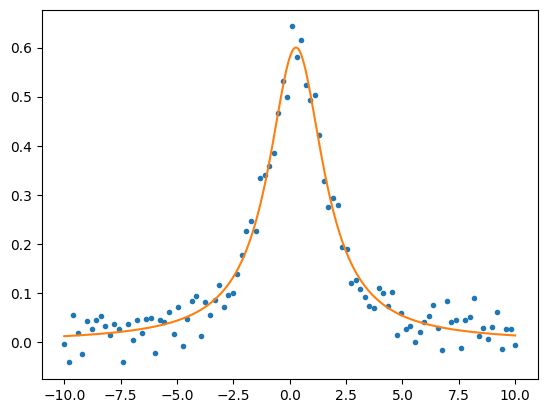

In [7]:
# Levenberg-Marquardt

# Note that this starting point doesn't converge for Newton!
a = np.array((1,1,4))

# we have two options: analytic or numerical derivatives
finite_difference = True

chisq1 = 1.0
chisq = 1e99
lam = 1e-3
# keep going while chisq is dropping
while chisq > 1e-6:
    # compute the update to the parameters
    f, A = lorentz(a, x, finite_difference=finite_difference)
    r = y-f
    chisq = np.sum(r**2)
    lhs = A.T@A
    lhs = lhs@(np.identity(len(a))*(1+lam))
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    # calculate the chisq associated with the new parameters
    a1 = a + da
    f1, A1 = lorentz(a1, x, finite_difference=finite_difference)
    r1 = y-f1
    chisq1 = np.sum(r1**2)
    print("chisq = %lg, a=(%lg, %lg, %lg), lam = %lg" % (chisq1 ,a1[0], a1[1], a1[2], lam))
    # accept if chisq decreases; reject if it increases
    if chisq1 > chisq:
        lam = lam * 10
    else:
        lam = lam / 10
        a = a1
        # if the improvement in chisq becomes too small then exit
        if chisq-chisq1 < 1e-3:
            break
    
print("a-a0 =", a-a0)

print("Best-fit parameters are: ", a)

plt.plot(x, y, ".")

xx = np.linspace(-10, 10, 1000)
yy, _ = lorentz(a, xx)
plt.plot(xx,yy)

plt.show()